In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDF = pd.read_csv(mouse_drug_data_to_load)
clinicalDF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseClinicalDF = pd.merge(clinicalDF, mouseDF, how = "left", on = "Mouse ID")

# Display the data table for preview
mouseClinicalDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVol = mouseClinicalDF.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorVol = pd.DataFrame(tumorVol).reset_index()

# Preview DataFrame
tumorVol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror = mouseClinicalDF.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stderror = pd.DataFrame(stderror).reset_index()

# Preview DataFrame
stderror.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumorVolVsTime = tumorVol.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
stdErrorVsTime = stderror.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
stdErrorVsTime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


No handles with labels found to put in legend.


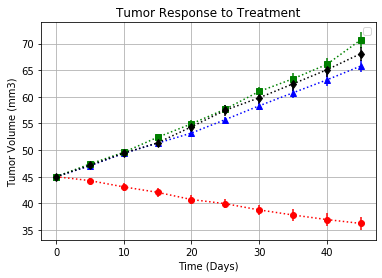

In [6]:
# Generate the Plot (with Error Bars)
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotDict = {"Capomulin":"ro:", "Infubinol":"b^:", "Ketapril":"gs:", "Placebo":"kd:"}

fig1, ax1 = plt.subplots()
for drug in drugList:
    ax1.errorbar(tumorVolVsTime.index, tumorVolVsTime[drug], stdErrorVsTime[drug], fmt = plotDict[drug])
ax1.legend()
plt.grid(True)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure

plt.savefig("TumorResponseToTreatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticDrug = mouseClinicalDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metastaticDrug = pd.DataFrame(metastaticDrug).reset_index()
# Preview DataFrame
metastaticDrug.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdErrorMetaStaticDrug = mouseClinicalDF.groupby(["Drug" ,"Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
stdErrorMetaStaticDrug = pd.DataFrame(stdErrorMetaStaticDrug).reset_index()
# Preview DataFrame
stdErrorMetaStaticDrug.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastaticTime = metastaticDrug.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
stdErrorMetaStaticDrug = stdErrorMetaStaticDrug.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
metastaticTime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

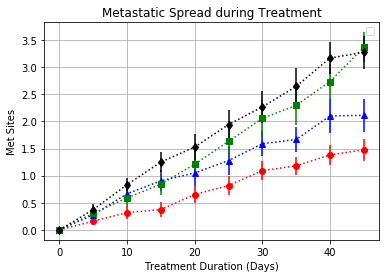

In [10]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()
for drug in drugList:
    ax2.errorbar(metastaticTime.index, metastaticTime[drug],
                stdErrorMetaStaticDrug[drug], fmt = plotDict[drug])
    
ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')

# Save the Figure
plt.savefig('MetastaticSpreadDuringTreatment.png')
# Show the Figure
plt.show

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseSurvived = mouseClinicalDF.groupby(['Drug', 'Timepoint'])["Mouse ID"].count()

# Convert to DataFrame
mouseSurvived = pd.DataFrame(mouseSurvived).reset_index()
mouseSurvived = mouseSurvived.rename(columns = {"Mouse ID":"Mouse Count"})
# Preview DataFrame
mouseSurvived.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouseSurvivesTime = mouseSurvived.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
# Preview the Data Frame
mouseSurvivesTime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


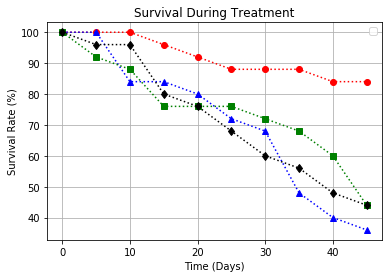

In [13]:
# Generate the Plot (Accounting for percentages)
mouseSurvived = pd.DataFrame()
for col in mouseSurvivesTime.columns:
    mouseSurvived[col] = 100 * mouseSurvivesTime[col]/25
    
fig3, ax3 = plt.subplots()
for drug in drugList:
    plt.plot(mouseSurvived.index, mouseSurvived[drug], plotDict[drug])
plt.grid(True)
ax3.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentChangeForDrug = (tumorVolVsTime.iloc[9,:]- tumorVolVsTime.iloc[0,:])/tumorVolVsTime.iloc[0,:] * 100
# Display the data to confirm
percentChangeForDrug

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
percentChange = percentChangeForDrug.to_frame()
percentChange = percentChange.rename(columns = {0:"Percent Change"})
percentChange["Pass"] = (percentChange<0)

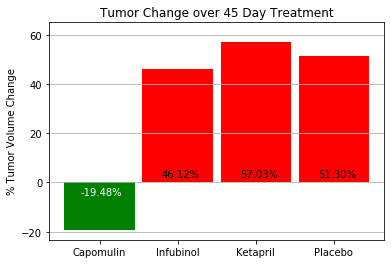

In [16]:
fig4, ax4=plt.subplots()
x=0

for drug in drugList:
    y = percentChange.loc[drug, "Percent Change"]
    if percentChange.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = 'g')
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = 'r')
        plt.text(x-.2, 2, '{:.2f}%'. format(y), color = "black")
    x = 1+x
plt.yticks((-20,0,20,40,60))
ax4.yaxis.grid()
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(ymax = 65)

plt.savefig("MeanTumorChange.png")

fig4.show()